In [131]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.max_columns = 50

import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN # ----- *****

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from catboost import CatBoostClassifier

import pickle

import networkx as nx

In [2]:
with zipfile.ZipFile('ds-programming-test.zip') as jz:
    with jz.open('train_set.csv') as jf1:
        jdf_train_raw = pd.read_csv(jf1)
    with jz.open('test_set.csv') as jf2:
        jdf_test = pd.read_csv(jf2)


c:\jvenv_datascience_2021\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
jdf_train_raw.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_lat',
       'start_lon', 'end_lat', 'end_lon', 'bike_id', 'plan_duration',
       'trip_route_category', 'passholder_type', 'start_station',
       'end_station'],
      dtype='object')

In [4]:
jdf_test.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_lat',
       'start_lon', 'end_lat', 'end_lon', 'bike_id', 'trip_route_category',
       'start_station', 'end_station'],
      dtype='object')

In [5]:
jdf_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              700000 non-null  int64  
 1   duration             700000 non-null  int64  
 2   start_time           700000 non-null  object 
 3   end_time             700000 non-null  object 
 4   start_lat            694437 non-null  float64
 5   start_lon            694437 non-null  float64
 6   end_lat              681426 non-null  float64
 7   end_lon              681426 non-null  float64
 8   bike_id              700000 non-null  object 
 9   plan_duration        699792 non-null  float64
 10  trip_route_category  700000 non-null  object 
 11  passholder_type      697424 non-null  object 
 12  start_station        700000 non-null  int64  
 13  end_station          700000 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 74.8+ MB


In [6]:
jdf_train_raw.sample(n=5)

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
450615,26595505,9,2017-05-04 21:34:00,2017-05-04 21:43:00,34.049889,-118.255882,34.049980,-118.247162,06487,0.0,One Way,Walk-up,3032,3027
225374,130042831,16,9/30/2019 20:11,9/30/2019 20:27,34.048401,-118.260948,34.074829,-118.258728,5974,30.0,One Way,Monthly Pass,3035,4220
136178,44376143,12,9/5/2017 20:30,9/5/2017 20:42,34.034801,-118.231277,34.046520,-118.237411,6638,365.0,One Way,Flex Pass,3037,3082
259636,65080169,7,2017-12-29 17:29:00,2017-12-29 17:36:00,34.049980,-118.247160,34.042110,-118.256180,06436,30.0,One Way,Monthly Pass,3027,3075
226025,34331045,13,7/8/2017 20:01,7/8/2017 20:14,34.056969,-118.253593,34.045540,-118.256668,6634,0.0,One Way,Walk-up,3049,3006


In [120]:
jdf_train_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
trip_id,700000.0,NaN,NaN,NaN,106946817.823264,44973415.895463,8369648.0,75380513.25,117940985.0,140417795.5,179483059.0
duration,700000.0,NaN,NaN,NaN,37.084979,125.30251,1.0,7.0,13.0,26.0,1440.0
start_time,700000,567695,2018-10-03 09:29:00,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_time,700000,547772,2018-07-17 17:08:00,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_lat,694437.0,NaN,NaN,NaN,34.044952,0.325255,33.710979,34.03746,34.046612,34.051941,55.705528
start_lon,694437.0,NaN,NaN,NaN,-118.253849,2.33264,-118.495422,-118.280952,-118.25698,-118.247162,118.238258
end_lat,681426.0,NaN,NaN,NaN,34.044175,0.299721,33.710979,34.037048,34.04652,34.050911,55.705528
end_lon,681426.0,NaN,NaN,NaN,-118.259183,2.129781,-118.495422,-118.280952,-118.256981,-118.246422,37.606541
bike_id,700000,7563,19544,1183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plan_duration,699792.0,NaN,NaN,NaN,44.928697,92.816296,0.0,1.0,30.0,30.0,999.0


In [90]:
def jdataframe_raw_transform_v3(jdf, jis_test_dataset = 0):
    """
    Apply transformation tasks to the dataframe "jdf" passed as parameter
    - Drop rows with "nulls" in any cell (dropna function)
    - Feature Creation: Calculate and generate distance column (one new field)
    - Feature Creation: create for start_time and end_time the hour and weekday fields (4 new fields)
    - Drop rows with values equal to zero and also drop outliers distances (few and too large distance)
        - Outliers deletion for columns: 'distance', 'duration'
    - One hot encoding column: 'trip_route_category'
    - Label encoding target column: 'passholder_type'

    - Drop "plan_duration" field because "test_set" does not contain "plan_duration" field
    """

    jdf = jdf.copy()
    if jis_test_dataset == 0:
        jdf.dropna(axis=0, inplace=True)
    
    def jdistancia_calc(jdf):
        """
        Haversine distance reference:
        https://www.genbeta.com/desarrollo/como-calcular-la-distancia-entre-dos-puntos-geograficos-en-c-formula-de-haversine

        return distances as Dataframe column (for example with the value returned you could create a new column called "distance")
        """
        jpickup_latitude_rad = np.radians(jdf['start_lat'].astype('float'))
        jpickup_longitude_rad = np.radians(jdf['start_lon'].astype('float'))
        jdropoff_latitude_rad = np.radians(jdf['end_lat'].astype('float'))
        jdropoff_longitude_rad = np.radians(jdf['end_lon'].astype('float'))
        jlongitude_distance = jdropoff_longitude_rad - jpickup_longitude_rad
        jlatitude_distance = jdropoff_latitude_rad - jpickup_latitude_rad

        ja = np.sin(jlatitude_distance / 2.0) ** 2 + np.cos(jpickup_latitude_rad) * np.cos(jdropoff_latitude_rad) * np.sin(jlongitude_distance / 2.0) ** 2
        jc = 2 * np.arcsin(np.sqrt(ja))
        jhaversine_distance = 6371 * jc
        return jhaversine_distance # in kilometers
    
    # TAKE HOUR AND DAY OF THE WEEK
    def jfeatures_creation(jdf):
        '''Create features using "key" field and calculates "distance"'''
        jdf['start_time_hour'] = jdf['start_time'].astype('datetime64').dt.hour.astype('int8')
        jdf['start_time_weekday'] = jdf['start_time'].astype('datetime64').dt.weekday.astype('int8')
        jdf['end_time_hour'] = jdf['end_time'].astype('datetime64').dt.hour.astype('int8')
        jdf['end_time_weekday'] = jdf['end_time'].astype('datetime64').dt.weekday.astype('int8')

        jdf['start_time'] = pd.to_datetime(jdf['start_time'], infer_datetime_format=True)# format='%m%d%Y%H%M') #.astype('datetime64')
        jdf['end_time'] = pd.to_datetime(jdf['end_time'], infer_datetime_format=True)# format='%m%d%Y%H%M')
        
        jdf['start_time_date'] = pd.to_datetime(jdf['start_time'], format='%d%m%Y').dt.date
        jdf['end_time_date'] = pd.to_datetime(jdf['end_time'],  format='%d%m%Y').dt.date
        jdf['demanda'] = 1
        return jdf
    
    # FEATURE CREATION: calculate distance:
    jdf['distance'] = jdistancia_calc(jdf)

    # FEATURE CREATION: for start_time and end_time create hour and weekday:
    jdf = jfeatures_creation(jdf)
    
    if jis_test_dataset == 0:
        # clean "distance" and "duration" outliers:
        jdf = jdf[ (jdf['distance'] > 0) & (jdf['distance'] < 2000) ] #3.2 #4 # 2000
        jdf = jdf[ (jdf['duration'] > 0) & (jdf['duration'] < 60) ] #31 #36 # 60
    
    # trip_route_category one hot encoding:
    jdf = pd.get_dummies(jdf, columns=['trip_route_category'])
    
    if jis_test_dataset == 0:
        # passholder_type label encoding:
        jlabel_encoder = LabelEncoder()
        jdf['passholder_type_t'] = jlabel_encoder.fit_transform(jdf['passholder_type'])
    
    if jis_test_dataset ==0:
        jdf = jdf.drop(columns=['plan_duration'])
    
    jdf = jdf.drop(columns=['start_lat', 'start_lon', 'end_lat', 'end_lon'])

    #print(jdf.info())
    #print(jdf.describe().T)
    return jdf

In [91]:
def jdataframe_raw_OneHotEnoding_transform(jdf, jis_test_dataset = 0):
    """
    Apply jdataframe_raw_transform_v2 and also the following transformations:
    - Delete 'Correlated' (because of same values) columns: 'end_time_hour', 'end_time_weekday'
    - Feature creation:
        - OneHot Encoding to 'start_time_hour', 'start_time_weekday' columns
        - Station difference: 1 if 'start_station' IS DIFFERENT to 'end_station'
    """
    
    jdf = jdataframe_raw_transform_v3(jdf=jdf, jis_test_dataset=jis_test_dataset)
    
    # delete columns:
    jdf.drop(columns=['end_time_hour', 'end_time_weekday'], inplace=True)

    jdf = pd.get_dummies(data=jdf, 
                        columns=['start_time_hour', 'start_time_weekday'], 
                        prefix=['start_time_hour', 'start_time_weekday'])

    print(jdf.info())
    return jdf

In [92]:
jdf_train_t2 = jdataframe_raw_transform_v3(jdf_train_raw)

In [119]:
jdf_train_t2.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'bike_id',
       'passholder_type', 'start_station', 'end_station', 'distance',
       'start_time_hour', 'start_time_weekday', 'end_time_hour',
       'end_time_weekday', 'start_time_date', 'end_time_date', 'demanda',
       'trip_route_category_One Way', 'trip_route_category_Round Trip',
       'passholder_type_t'],
      dtype='object')

In [93]:
jdf_train_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529749 entries, 1 to 699999
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_id                         529749 non-null  int64         
 1   duration                        529749 non-null  int64         
 2   start_time                      529749 non-null  datetime64[ns]
 3   end_time                        529749 non-null  datetime64[ns]
 4   bike_id                         529749 non-null  object        
 5   passholder_type                 529749 non-null  object        
 6   start_station                   529749 non-null  int64         
 7   end_station                     529749 non-null  int64         
 8   distance                        529749 non-null  float64       
 9   start_time_hour                 529749 non-null  int8          
 10  start_time_weekday              529749 non-null  int8   

In [94]:
jdf_train_t2.sample(n=5)

,trip_id,duration,start_time,end_time,bike_id,passholder_type,start_station,end_station,distance,start_time_hour,start_time_weekday,end_time_hour,end_time_weekday,start_time_date,end_time_date,demanda,trip_route_category_One Way,trip_route_category_Round Trip,passholder_type_t
527625,138384576,42,2020-02-29 14:38:00,2020-02-29 15:20:00,16790,Monthly Pass,4447,4482,5.801845,14,5,15,5,2020-02-29,2020-02-29,1,1,0,2
530895,21835306,23,2017-03-11 11:16:00,2017-03-11 11:39:00,5787,Walk-up,3058,3023,1.827298,11,5,11,5,2017-03-11,2017-03-11,1,1,0,5
189970,65978779,2,2018-01-04 14:05:00,2018-01-04 14:07:00,06144,Monthly Pass,3064,3005,0.236359,14,3,14,3,2018-01-04,2018-01-04,1,1,0,2
329668,26500462,14,2017-05-02 12:30:00,2017-05-02 12:44:00,6419,Walk-up,3038,3077,0.788372,12,1,12,1,2017-05-02,2017-05-02,1,1,0,5
632655,160981142,23,2021-05-19 17:21:00,2021-05-19 17:44:00,6380,Monthly Pass,3076,3058,1.977767,17,2,17,2,2021-05-19,2021-05-19,1,1,0,2


Saturación del servicio: La empresa busca contar con la disponibilidad más alta
de servicio en el mercado, por lo que se quiere entender cómo se comporta la
demanda de servicio en las distintas estaciones y horarios para cada plan

In [97]:
jdf_train_t2_gruped_station_all = jdf_train_t2.groupby(by=['start_station'], as_index=False)['demanda'].count()
jdf_train_t2_gruped_station_all

,start_station,demanda
0,3005,23981
1,3006,10709
2,3007,9670
3,3008,7777
4,3009,3
...,...,...
353,4583,367
354,4584,30
355,4587,313
356,4593,11


<AxesSubplot:xlabel='start_station', ylabel='demanda'>

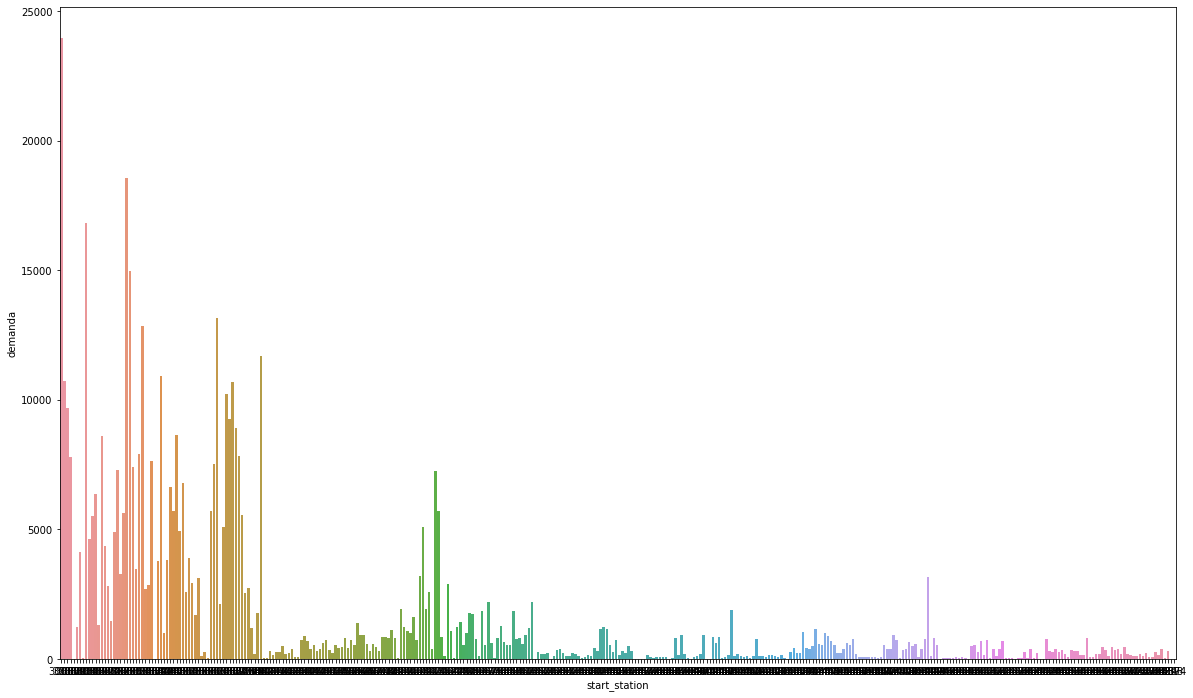

In [99]:
jfig, jax = plt.subplots(figsize=(20,12))
sns.barplot(data=jdf_train_t2_gruped_station_all, x='start_station', y='demanda', ax=jax)

     start_station  demanda
0             3005    23981
1             3006    10709
2             3007     9670
3             3008     7777
4             3009        3
..             ...      ...
353           4583      367
354           4584       30
355           4587      313
356           4593       11
357           4594        4

[358 rows x 2 columns]
(11, 2)
    start_station  demanda
0            3005    23981
21           3030    18580
8            3014    16822
22           3031    14957
50           3064    13148
26           3035    12847
64           3082    11707
32           3042    10921
1            3006    10709
55           3069    10697
53           3067    10234


[Text(0, 0, '23981'),
 Text(0, 0, '10709'),
 Text(0, 0, '16822'),
 Text(0, 0, '18580'),
 Text(0, 0, '14957'),
 Text(0, 0, '12847'),
 Text(0, 0, '10921'),
 Text(0, 0, '13148'),
 Text(0, 0, '10234'),
 Text(0, 0, '10697'),
 Text(0, 0, '11707')]

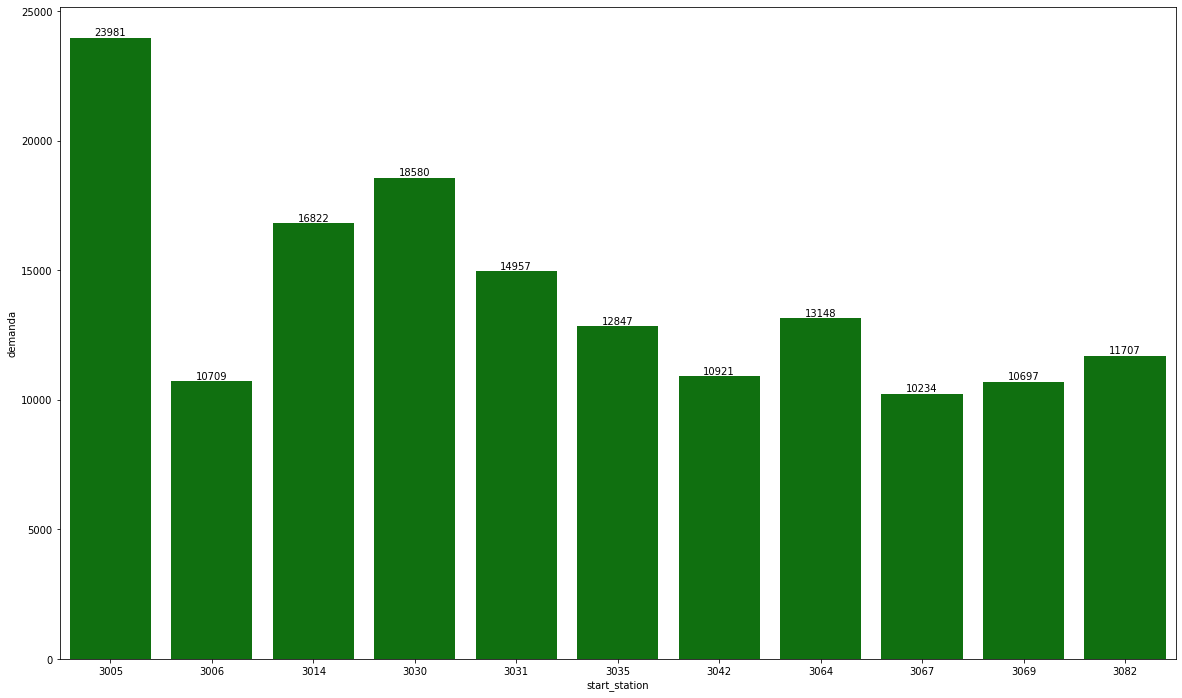

In [221]:
# START STATION:
jdf_train_t2_gruped_station_all_start = jdf_train_t2.groupby(by=['start_station'], as_index=False)['demanda'].count()
print(jdf_train_t2_gruped_station_all_start)

# percentile 90%
jpercentile_start = np.percentile(jdf_train_t2_gruped_station_all_start['demanda'], 97)
jdf_train_t2_gruped_station_all_start = jdf_train_t2_gruped_station_all_start[ jdf_train_t2_gruped_station_all_start['demanda'] > jpercentile_start ].sort_values(by='demanda', ascending=False)
print(jdf_train_t2_gruped_station_all_start.shape)
print(jdf_train_t2_gruped_station_all_start)

jfig, jax = plt.subplots(figsize=(20,12))
jax = sns.barplot(data=jdf_train_t2_gruped_station_all_start, x='start_station', y='demanda', ax=jax, color='green')
jax.bar_label(jax.containers[0])

In [ ]:
jdf_train_t2_gruped_station_all_start

In [212]:
jdf_train_t2_gruped_station_all_start.columns

Index(['start_station', 'demanda'], dtype='object')

In [ ]:
jfig, jax = plt.subplots(figsize=(20,12))
sns.lineplot(data=jdf_train_t2_gruped_station, x='start_time_date', y='trip_id', hue='start_station', ax=jax)

     end_station  demanda
0           3000        2
1           3005    26434
2           3006    11063
3           3007     7740
4           3008     8235
..           ...      ...
359         4583      338
360         4584       33
361         4587      321
362         4593        9
363         4594        9

[364 rows x 2 columns]
(11, 2)
     end_station  demanda
1           3005    26434
9           3014    19013
23          3031    16405
22          3030    15926
51          3064    13657
65          3082    13600
27          3035    13535
33          3042    13308
56          3069    11315
2           3006    11063
123         4215    10176


[Text(0, 0, '26434'),
 Text(0, 0, '11063'),
 Text(0, 0, '19013'),
 Text(0, 0, '15926'),
 Text(0, 0, '16405'),
 Text(0, 0, '13535'),
 Text(0, 0, '13308'),
 Text(0, 0, '13657'),
 Text(0, 0, '11315'),
 Text(0, 0, '13600'),
 Text(0, 0, '10176')]

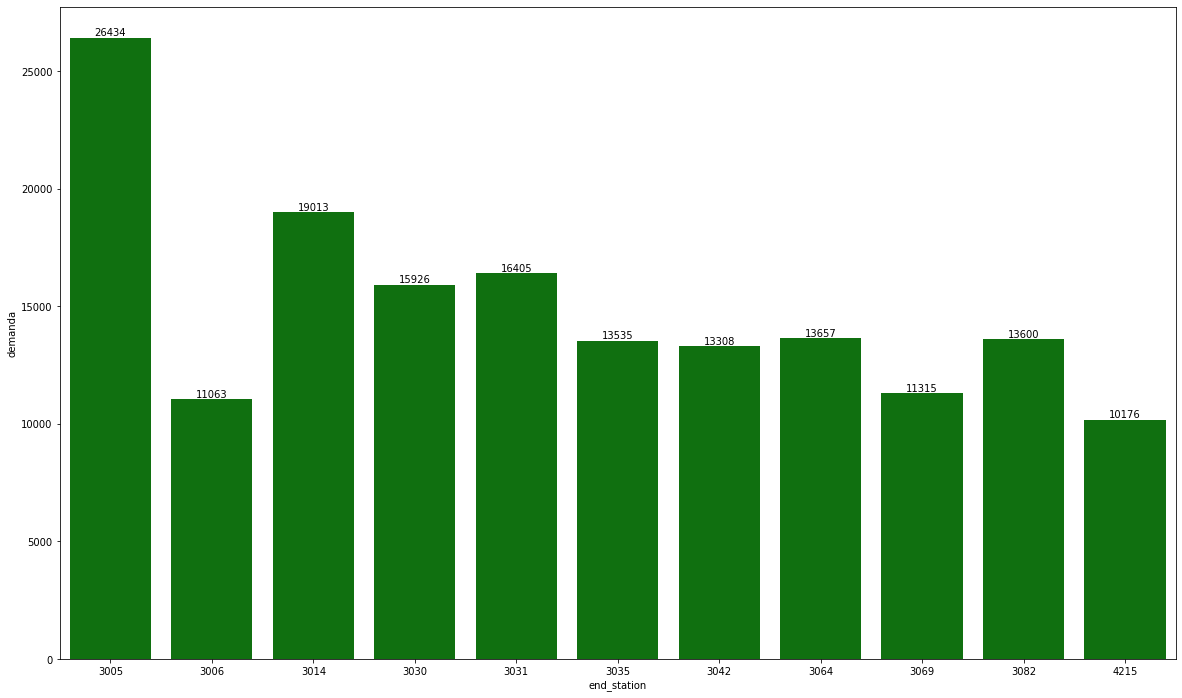

In [222]:
# END STATION:
jdf_train_t2_gruped_station_all_end = jdf_train_t2.groupby(by=['end_station'], as_index=False)['demanda'].count()
print(jdf_train_t2_gruped_station_all_end)

# percentile 90%
jpercentile = np.percentile(jdf_train_t2_gruped_station_all_end['demanda'], 97)
jdf_train_t2_station_most_demanded_end = jdf_train_t2_gruped_station_all_end[ jdf_train_t2_gruped_station_all_end['demanda'] > jpercentile ].sort_values(by='demanda', ascending=False)
print(jdf_train_t2_station_most_demanded_end.shape)
print(jdf_train_t2_station_most_demanded_end)

jfig, jax = plt.subplots(figsize=(20,12))
jax = sns.barplot(data=jdf_train_t2_station_most_demanded_end, x='end_station', y='demanda', ax=jax, color='green')
jax.bar_label(jax.containers[0])

In [162]:
jdf_train_t2_graph_start_demanded = jdf_train_t2[ jdf_train_t2['start_station'].isin(jdf_train_t2_gruped_station_all_start['start_station']) ]


In [ ]:
jfig, jax = plt.subplots(figsize=(20,12))
sns.lineplot(data=jdf_train_t2_gruped_station, x='start_time_date', y='trip_id', hue='start_station', ax=jax)

plot a graph start station

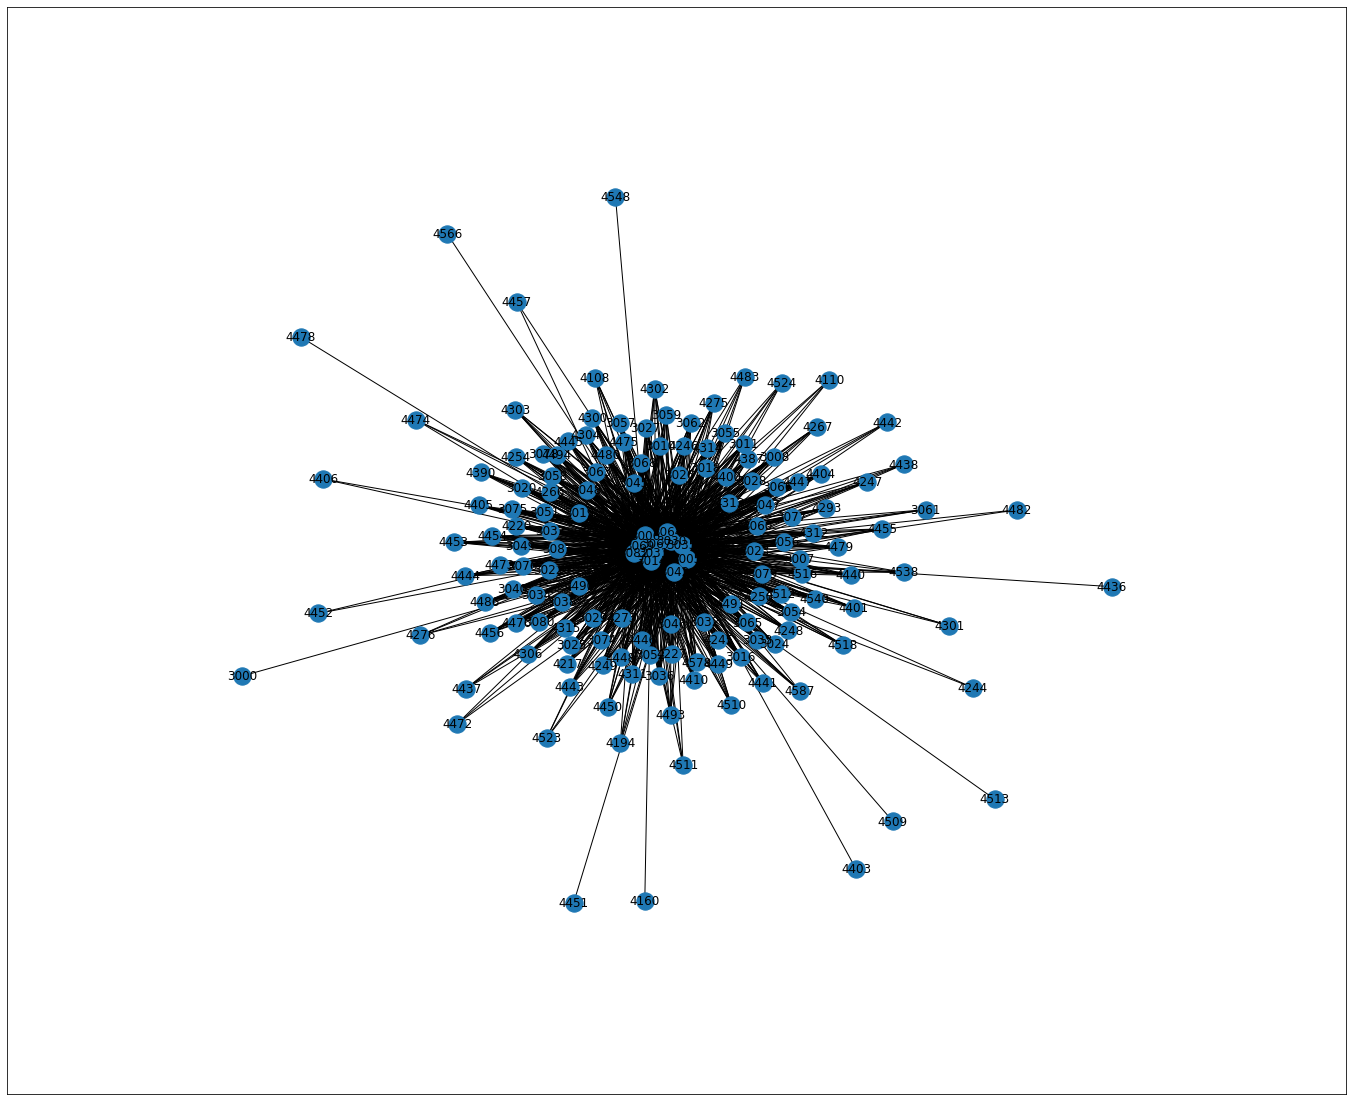

In [197]:
jdf_train_t2_graph_start_demanded = jdf_train_t2[ jdf_train_t2['start_station'].isin(jdf_train_t2_gruped_station_all_start['start_station']) ]

plt.figure(figsize=(24,20))
jax = plt.gca()
jax.margins(0.20)
jgraph = nx.from_pandas_edgelist(jdf_train_t2_graph_start_demanded, 'start_station', 'end_station')
nx.spring_layout(jgraph, 0.25) 
nx.draw_networkx(jgraph, with_labels=True, node_size=300)
plt.show()

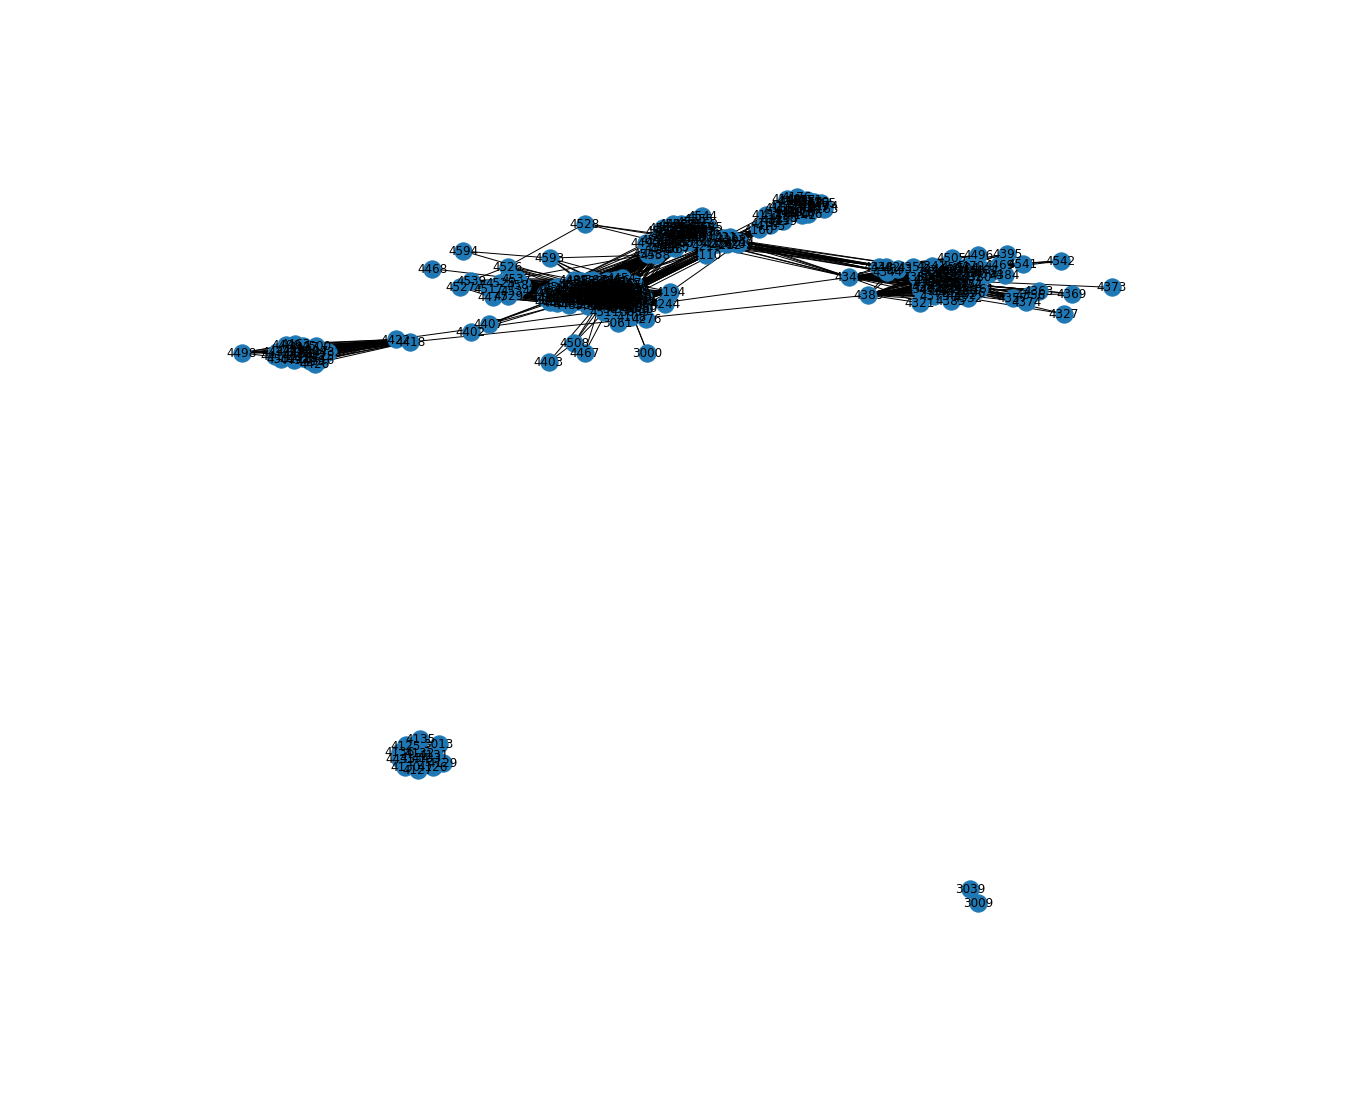

In [206]:
# ALL STATIONS
plt.figure(figsize=(24,20))
jax = plt.gca()
jax.margins(0.20)
jgraph = nx.from_pandas_edgelist(jdf_train_t2, 'start_station', 'end_station')
nx.spring_layout(jgraph, 0.25)#k=5/np.sqrt(jgraph.order()))
#nx.draw_networkx(jgraph, with_labels=True, node_size=300)
nx.draw(jgraph, with_labels=True)
#nx.draw_circular(jgraph, with_labels=True, node_size=500)
#nx.draw_networkx_nodes(jgraph)
plt.show()

In [ ]:
# over 1000
jdf_train_t2_gruped_station_all[ jdf_train_t2_gruped_station_all['demanda'] > 2000 ]
# over the median
#jdf_train_t2_gruped_station_all[ jdf_train_t2_gruped_station_all['demanda'] > jdf_train_t2_gruped_station_all['demanda'].median() ]

<AxesSubplot:xlabel='start_station', ylabel='demanda'>

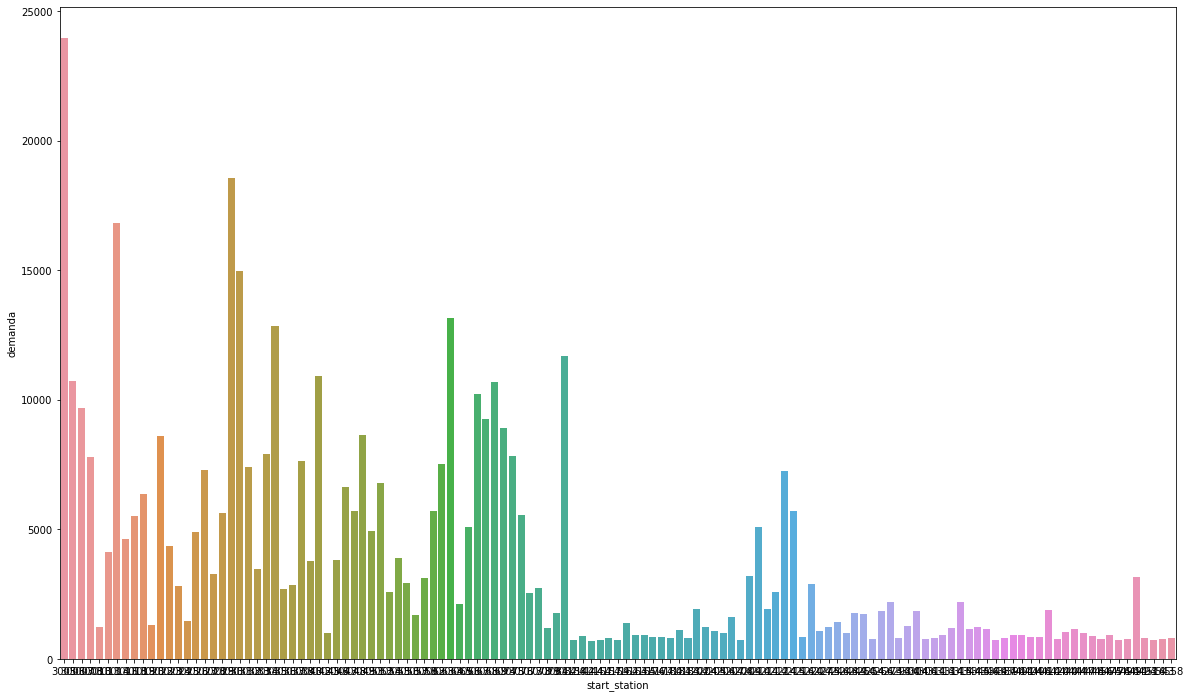

In [105]:
jfig, jax = plt.subplots(figsize=(20,12))
sns.barplot(data=jdf_train_t2_gruped_station_all[ jdf_train_t2_gruped_station_all['demanda'] > 700 ], 
            x='start_station', y='demanda', ax=jax)

In [29]:
jdf_train_t2_gruped = jdf_train_t2.groupby(by=['start_station', 'passholder_type','start_time'], as_index=False)['trip_id'].count()
jdf_train_t2_gruped

,start_station,passholder_type,start_time,trip_id
0,3005,Annual Pass,2018-10-04 09:02:00,1
1,3005,Annual Pass,2018-10-09 11:48:00,1
2,3005,Annual Pass,2018-10-11 18:59:00,2
3,3005,Annual Pass,2018-10-12 08:42:00,1
4,3005,Annual Pass,2018-10-16 07:13:00,1
...,...,...,...,...
520073,4593,Walk-up,2021-12-05 14:27:00,1
520074,4594,Monthly Pass,2021-12-05 11:07:00,1
520075,4594,Monthly Pass,2021-12-05 12:56:00,1
520076,4594,Walk-up,2021-12-05 13:05:00,1


In [33]:
jdf_train_t2['start_station'].unique().shape

(358,)

In [62]:
jdf_train_t2_gruped_station = jdf_train_t2.groupby(by=['start_station', 'start_time_date'], as_index=False)['trip_id'].count()
jdf_train_t2_gruped_station

,start_station,start_time_date,trip_id
0,3005,2016-10-01,7
1,3005,2016-10-02,5
2,3005,2016-10-03,10
3,3005,2016-10-04,12
4,3005,2016-10-05,19
...,...,...,...
154641,4587,2021-12-20,1
154642,4587,2021-12-23,1
154643,4587,2021-12-26,1
154644,4593,2021-12-05,11


      start_station start_time_date  demanda
0              3005      2016-10-01        7
1              3005      2016-10-02        5
2              3005      2016-10-03       10
3              3005      2016-10-04       12
4              3005      2016-10-05       19
...             ...             ...      ...
1837           3005      2021-12-26        2
1838           3005      2021-12-27        2
1839           3005      2021-12-28        2
1840           3005      2021-12-30        3
1841           3005      2021-12-31        4

[1842 rows x 3 columns]


<AxesSubplot:xlabel='start_time_date', ylabel='demanda'>

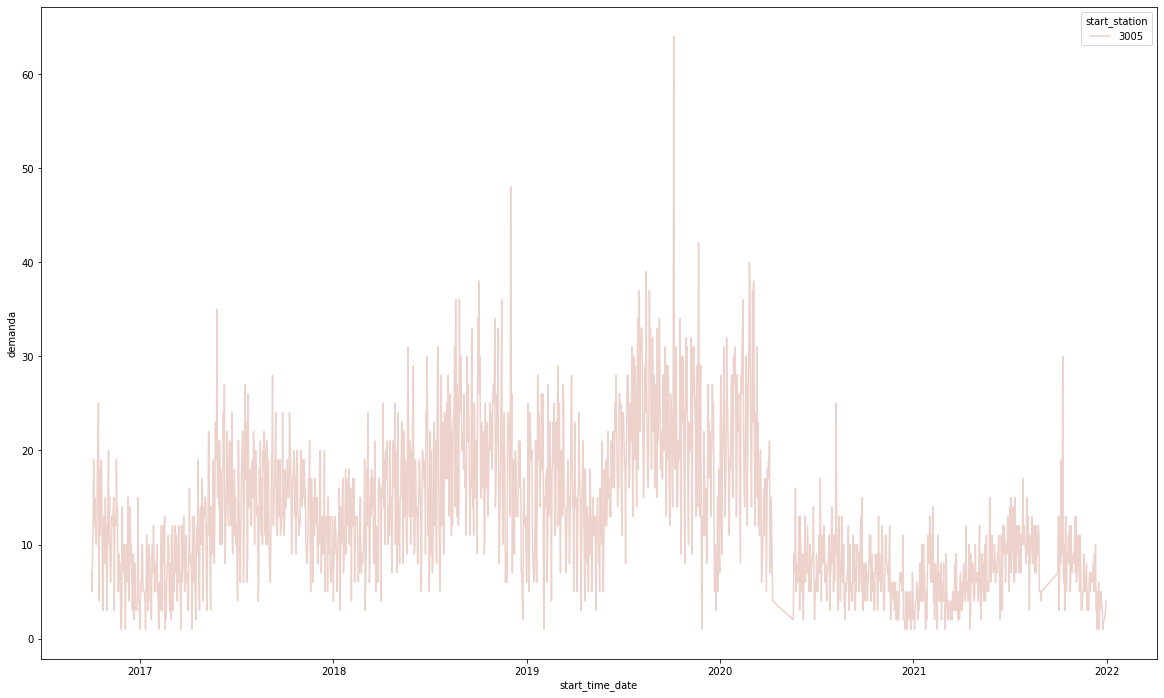

In [261]:
jdf_train_t2_gruped_station2 = jdf_train_t2[jdf_train_t2['start_station'] == 3005] \
                                .groupby(by=['start_station', 'start_time_date'], as_index=False)['demanda'].sum()
print(jdf_train_t2_gruped_station2)

jfig, jax = plt.subplots(figsize=(20,12))
sns.lineplot(data=jdf_train_t2_gruped_station2, x='start_time_date', y='demanda', hue='start_station', ax=jax)

In [66]:
print('std = ', jdf_train_t2_gruped_station2['demanda'].std())
print('3 * std = ', jdf_train_t2_gruped_station2['demanda'].std() * 3)

std =  7.756139827965987
3 * std =  23.26841948389796


In [74]:
jarray = np.ones(jdf_train_t2_gruped_station2.shape[0]) * (jdf_train_t2_gruped_station2['demanda'].std()*3)
jarray.shape

(1842,)

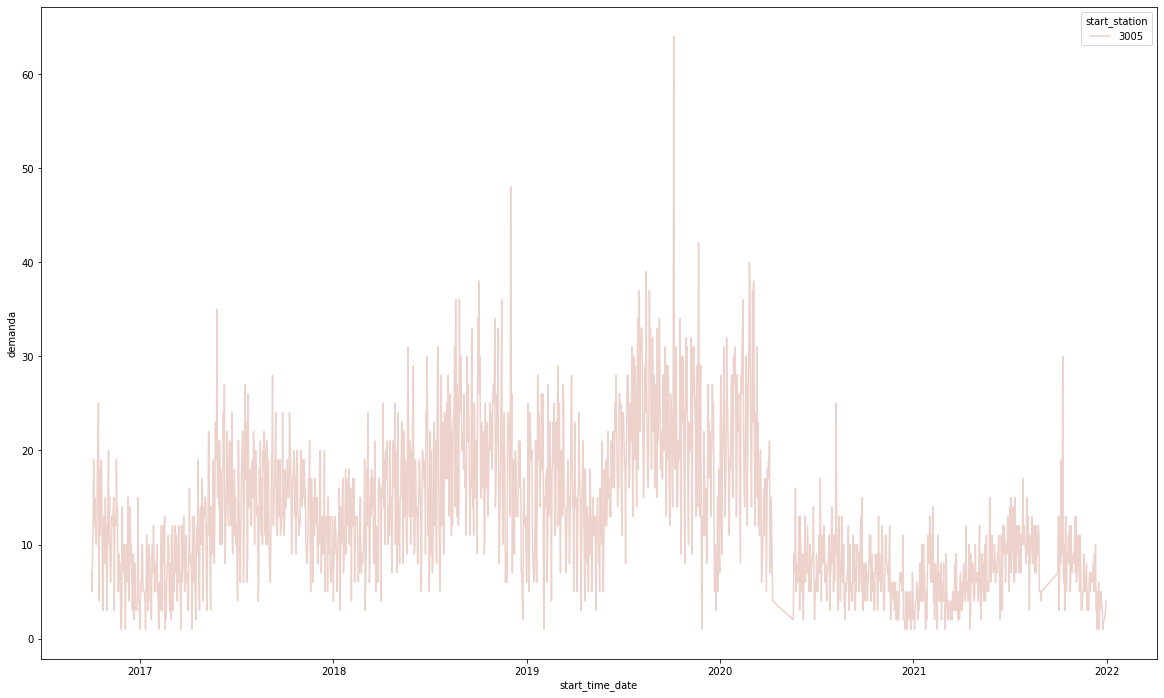

In [81]:
jfig, jax = plt.subplots(figsize=(20,12))
sns.lineplot(data=jdf_train_t2_gruped_station2, x='start_time_date', y='demanda', hue='start_station', ax=jax)
#jarray = np.ones(jdf_train_t2_gruped_station2.shape[0]) * (jdf_train_t2_gruped_station2['demanda'].std()*3)

In [59]:
jdf_train_t2_gruped_station2 = jdf_train_t2.groupby(by=['start_station', 'start_time_date'], as_index=False)['one'].agg(['count','sum'])
jdf_train_t2_gruped_station2

count  sum
start_station start_time_date            
3005          2016-10-01           7    7
              2016-10-02           5    5
              2016-10-03          10   10
              2016-10-04          12   12
              2016-10-05          19   19
...                              ...  ...
4587          2021-12-20           1    1
              2021-12-23           1    1
              2021-12-26           1    1
4593          2021-12-05          11   11
4594          2021-12-05           4    4

[154646 rows x 2 columns]

<AxesSubplot:xlabel='start_time_date', ylabel='trip_id'>

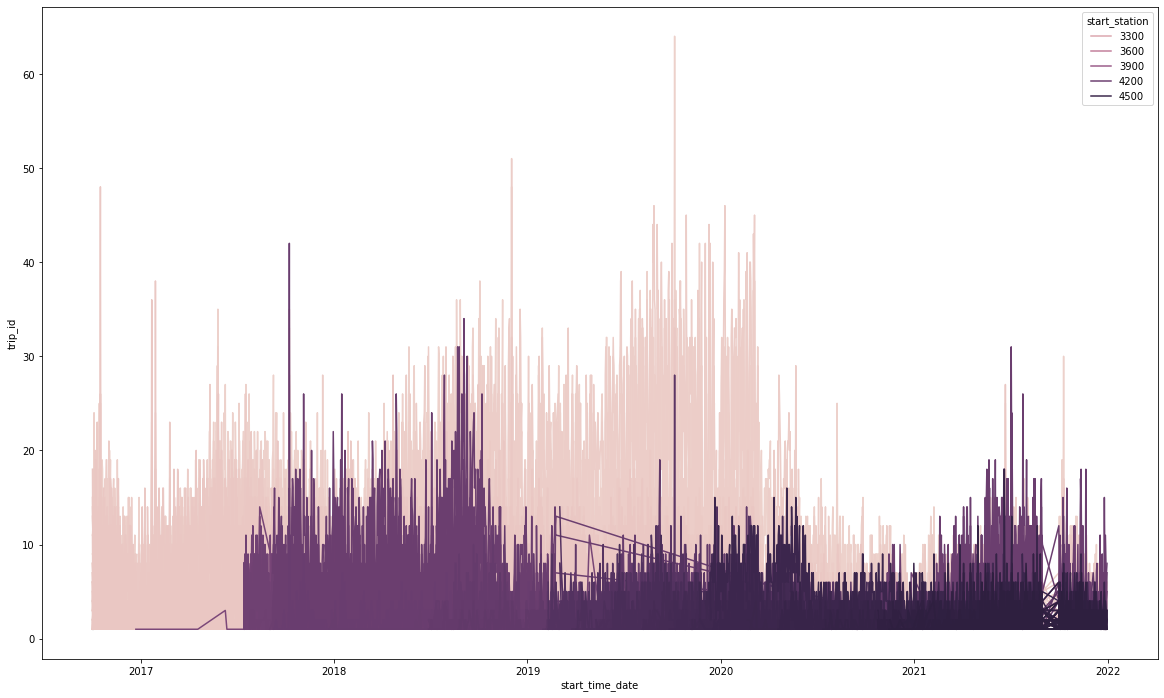

In [43]:
jfig, jax = plt.subplots(figsize=(20,12))
sns.lineplot(data=jdf_train_t2_gruped_station, x='start_time_date', y='trip_id', hue='start_station', ax=jax)


In [88]:
def jplot_station_demanda(jvar_station):
    jdf_train_t2_gruped_station2 = jdf_train_t2[jdf_train_t2['start_station'] == jvar_station] \
                                .groupby(by=['start_station', 'start_time_date'], as_index=False)['demanda'].sum()
    # plot data:
    jfig, jax = plt.subplots(figsize=(20,12))
    sns.lineplot(data=jdf_train_t2_gruped_station2, x='start_time_date', y='demanda', hue='start_station', ax=jax)
    # std:
    jdemanda_std = jdf_train_t2_gruped_station2['demanda'].std()
    print('std = ', jdemanda_std)
    print('3 * std = ', jdemanda_std * 3)
    return jdf_train_t2_gruped_station2, jdemanda_std

std =  3.4724522802741884
3 * std =  10.417356840822565


(      start_station start_time_date  demanda
 0              3067      2016-10-01        8
 1              3067      2016-10-02        6
 2              3067      2016-10-03        8
 3              3067      2016-10-04       17
 4              3067      2016-10-05        7
 ...             ...             ...      ...
 1495           3067      2020-12-10        1
 1496           3067      2020-12-13        2
 1497           3067      2020-12-16        2
 1498           3067      2020-12-20        2
 1499           3067      2020-12-27        1
 
 [1500 rows x 3 columns],
 3.4724522802741884)

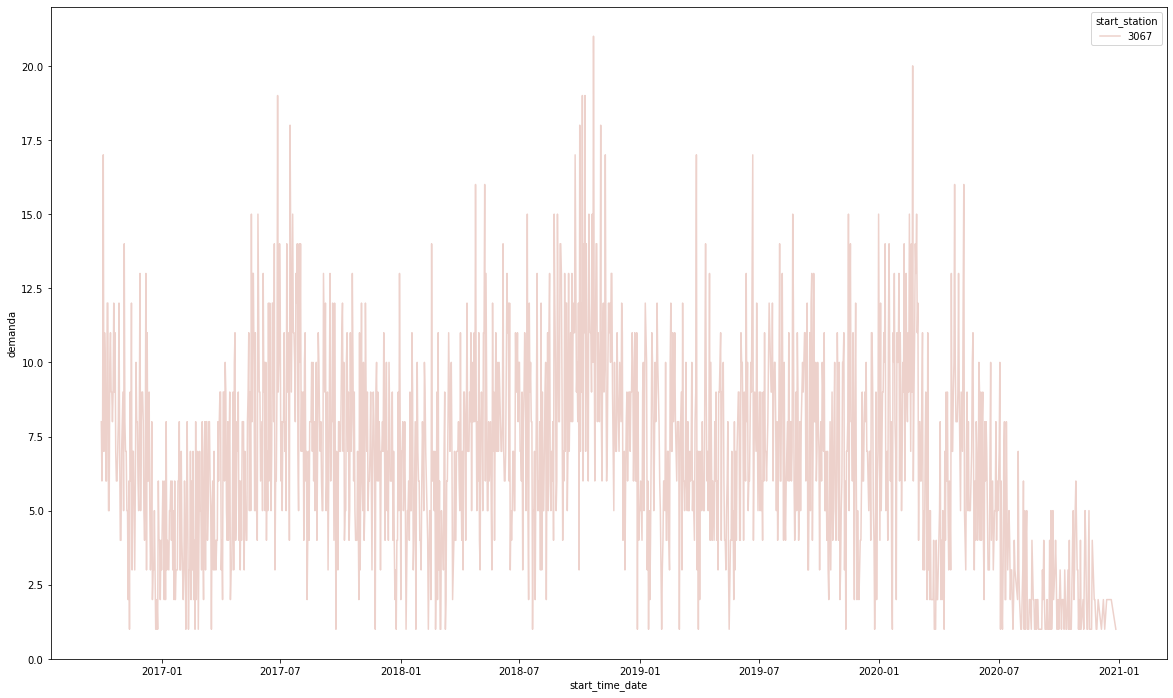

In [117]:
jplot_station_demanda(3067)

Station and hour

In [223]:
jdf_train_t2_grouped_station_hour = jdf_train_t2.groupby(by=['start_station', 'start_time_hour'], as_index=False)['demanda'].count()
jdf_train_t2_grouped_station_hour

,start_station,start_time_hour,demanda
0,3005,0,295
1,3005,1,171
2,3005,2,120
3,3005,3,68
4,3005,4,58
...,...,...,...
6892,4593,13,3
6893,4593,14,2
6894,4594,11,1
6895,4594,12,1


In [224]:
jdf_train_t2_grouped_station_hour.describe().T

,count,mean,std,min,25%,50%,75%,max
start_station,6897.0,4090.677831,558.492726,3005.0,4144.0,4330.0,4461.0,4594.0
start_time_hour,6897.0,12.453531,6.480264,0.0,8.0,13.0,18.0,23.0
demanda,6897.0,76.808612,189.079288,1.0,5.0,17.0,53.0,3743.0


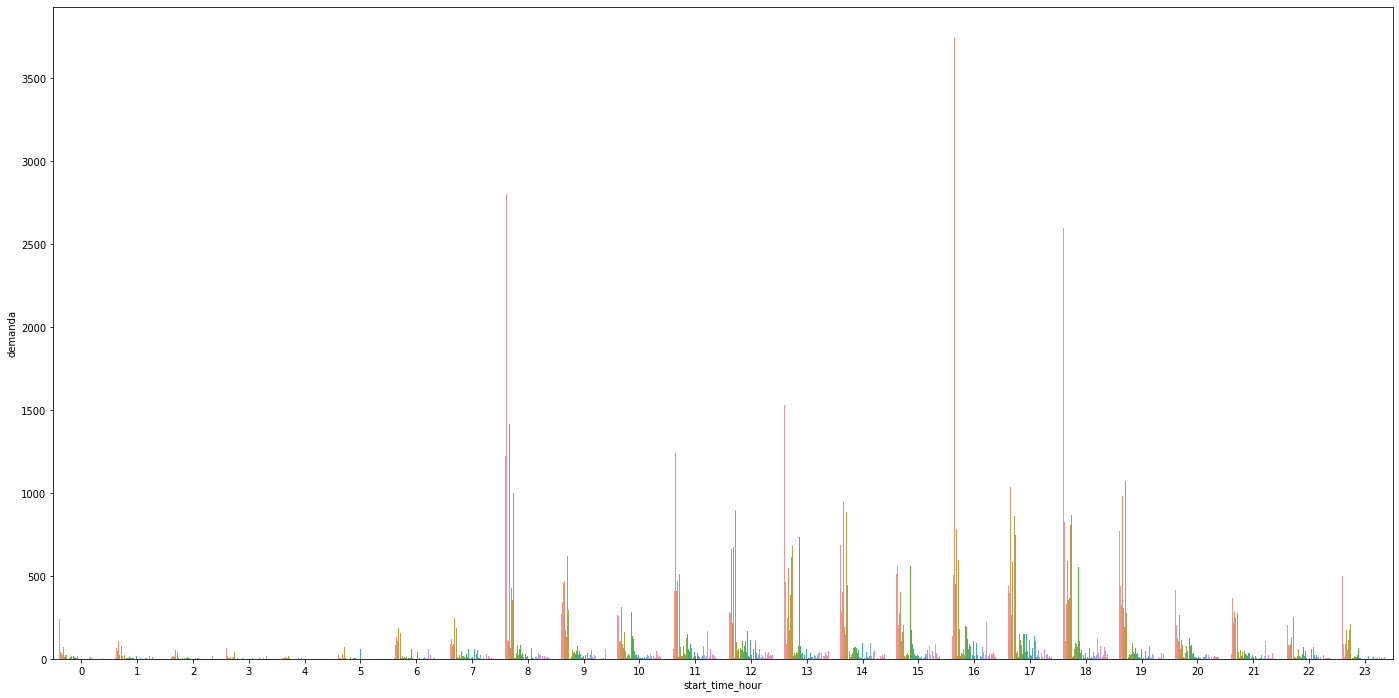

In [236]:
jfig, jax = plt.subplots(figsize=(24,12))
jp = sns.barplot(data=jdf_train_t2_grouped_station_hour, x='start_time_hour', y='demanda', hue='start_station', ax=jax)
jp.legend_.remove()

<AxesSubplot:xlabel='start_time_hour', ylabel='demanda'>

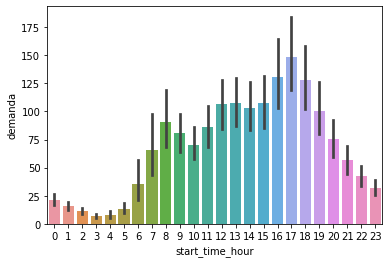

In [233]:
sns.barplot(data=jdf_train_t2_grouped_station_hour, x='start_time_hour', y='demanda')

In [230]:
jpercentile_start_hour = np.percentile(jdf_train_t2_grouped_station_hour['demanda'], 97)
jpercentile_start_hour

556.1199999999999

In [240]:
jpercentile_start_hour = np.percentile(jdf_train_t2_grouped_station_hour['demanda'], 97)
jdf_train_t2_grouped_station_hour_demanded = jdf_train_t2_grouped_station_hour[ jdf_train_t2_grouped_station_hour['demanda'] > jpercentile_start_hour]
jdf_train_t2_grouped_station_hour_demanded

,start_station,start_time_hour,demanda
8,3005,8,1222
9,3005,9,918
10,3005,10,952
11,3005,11,1296
12,3005,12,1661
...,...,...,...
2621,4214,15,767
2622,4214,16,869
2623,4214,17,818
2645,4215,15,598


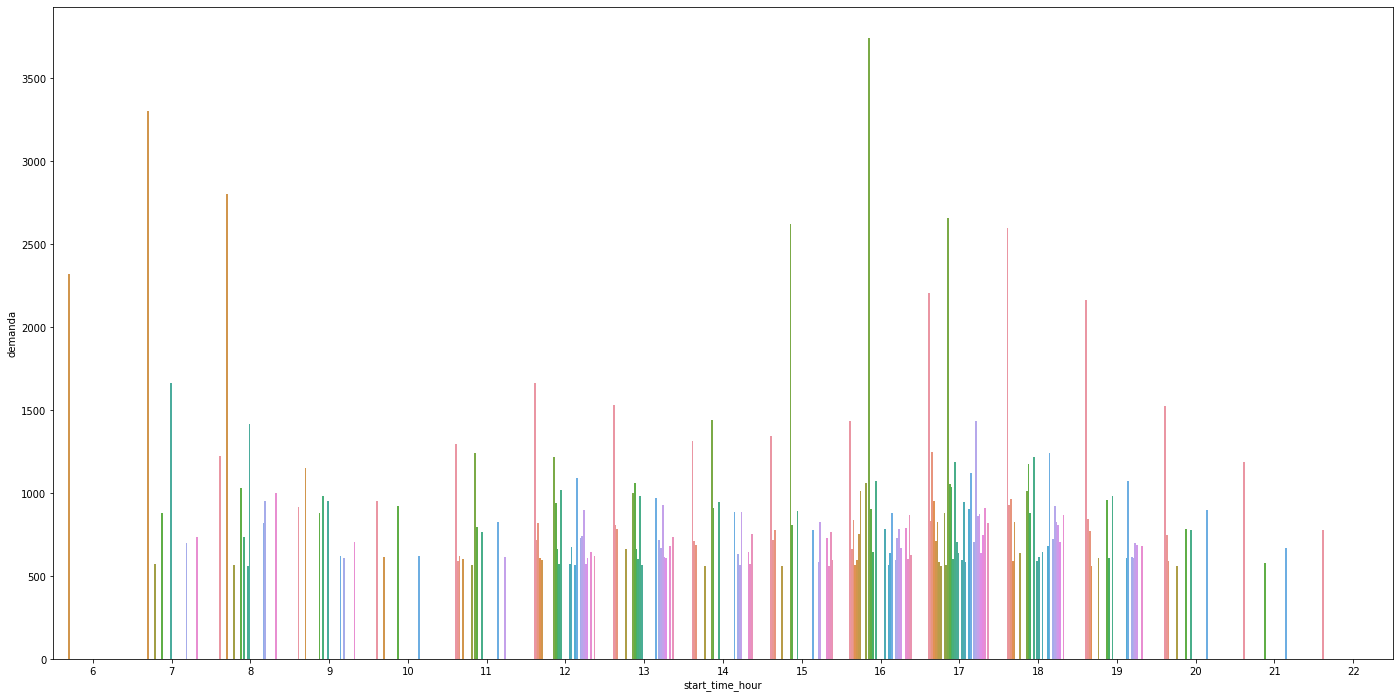

In [239]:
jfig, jax = plt.subplots(figsize=(24,12))
jp = sns.barplot(data=jdf_train_t2_grouped_station_hour_demanded, x='start_time_hour', y='demanda', hue='start_station', ax=jax)
jp.legend_.remove()

    start_time_hour  demanda
0                 6     2318
1                 7     7844
2                 8    11103
3                 9     6807
4                10     3112
5                11     7914
6                12    16531
7                13    14576
8                14    11508
9                15    12549
10               16    21814
11               17    28371
12               18    19414
13               19    12456
14               20     5879
15               21     2432
16               22      776


<AxesSubplot:xlabel='start_time_hour', ylabel='demanda'>

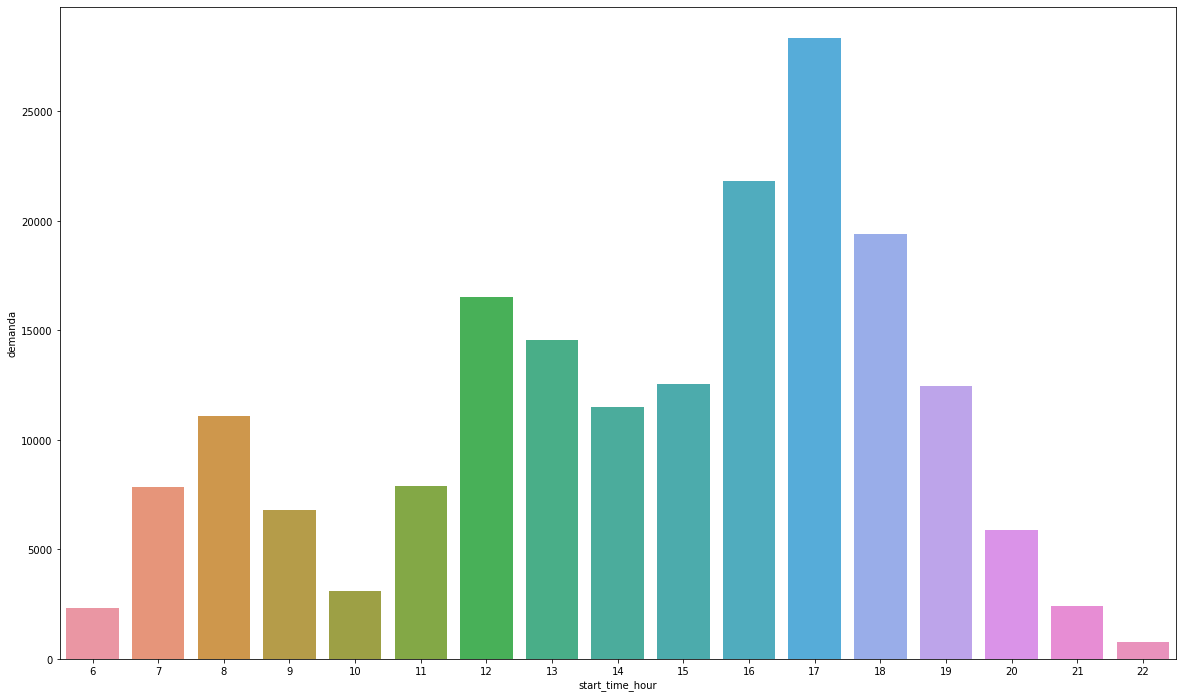

In [243]:
jdf_train_t2_grouped_station_hour_demanded_hr = jdf_train_t2_grouped_station_hour_demanded.groupby(by=['start_time_hour'], as_index=False)['demanda'].sum()
print(jdf_train_t2_grouped_station_hour_demanded_hr)
jfig, jax = plt.subplots(figsize=(20,12))
sns.barplot(data=jdf_train_t2_grouped_station_hour_demanded_hr, x='start_time_hour', y='demanda', ax=jax)

In [260]:
# by hour which station has more demand
jtemp = jdf_train_t2_grouped_station_hour_demanded.groupby(by=['start_time_hour', 'start_station'], as_index=False).max()

jdf_hour_station_demanded = pd.DataFrame()
for jhr in np.arange(jtemp['start_time_hour'].min(), jtemp['start_time_hour'].max()+1):
    jdf_hour_station_demanded = jdf_hour_station_demanded.append( jtemp[ (jtemp['start_time_hour'] == jhr) ].sort_values(by='demanda', ascending=False).head(n=1) )

print(jdf_hour_station_demanded)
jfig, jax = plt.subplots(figsize=(20,12))
sns.barplot(data=jdf_hour_station_demanded, x='start_time_hour', y='demanda')

,start_time_hour,start_station,demanda
0,6,3014,2318
1,7,3014,3299
8,8,3014,2799
18,9,3014,1151
25,10,3005,952
29,11,3005,1296
39,12,3005,1661
60,13,3005,1532
82,14,3030,1440
96,15,3030,2619


      start_station start_time_date  demanda
0              3005      2016-10-01        7
1              3005      2016-10-02        5
2              3005      2016-10-03       10
3              3005      2016-10-04       12
4              3005      2016-10-05       19
...             ...             ...      ...
8875           3064      2021-12-26        1
8876           3064      2021-12-27        2
8877           3064      2021-12-28        5
8878           3064      2021-12-29        1
8879           3064      2021-12-31        2

[8880 rows x 3 columns]


<AxesSubplot:xlabel='start_time_date', ylabel='demanda'>

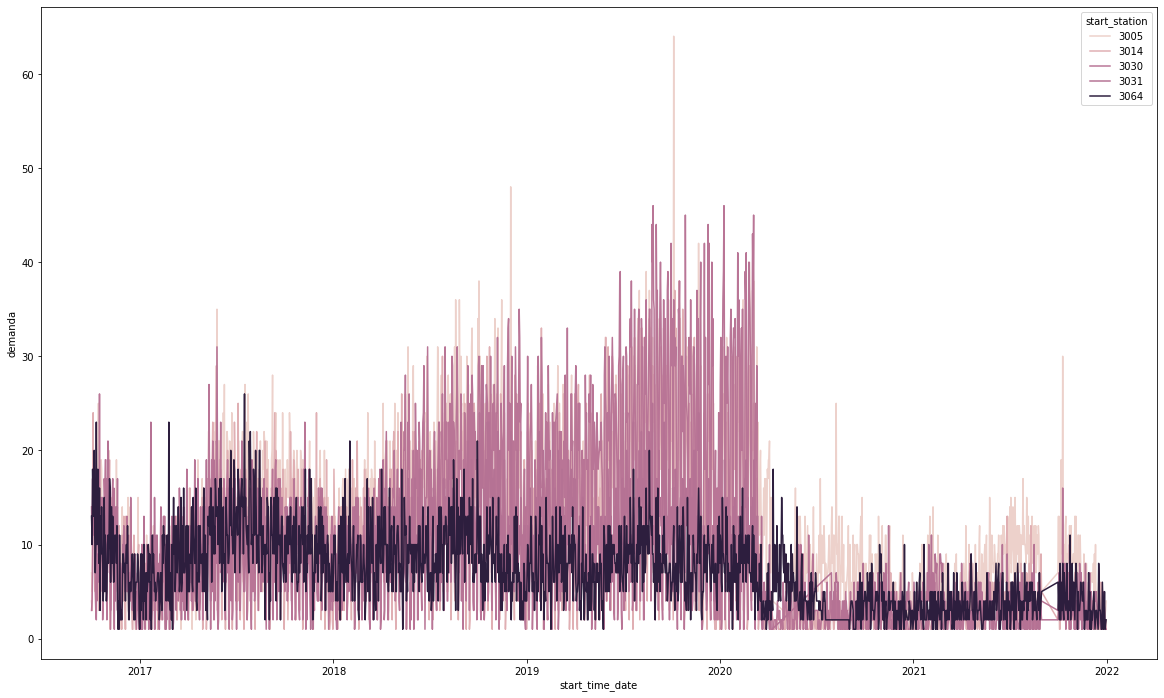

In [263]:
jtemp_top5 = jdf_train_t2_gruped_station_all_start['start_station'].head(n=5)

jdf_train_t2_gruped_station2 = jdf_train_t2[jdf_train_t2['start_station'].isin(jtemp_top5)] \
                                .groupby(by=['start_station', 'start_time_date'], as_index=False)['demanda'].sum()
print(jdf_train_t2_gruped_station2)

jfig, jax = plt.subplots(figsize=(20,12))
sns.lineplot(data=jdf_train_t2_gruped_station2, x='start_time_date', y='demanda', hue='start_station', ax=jax)

In [262]:
jdf_train_t2_gruped_station_all_start['start_station'].head(n=5)

0     3005
21    3030
8     3014
22    3031
50    3064
Name: start_station, dtype: int64

Demanda por años

In [274]:
jdf_train_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529749 entries, 1 to 699999
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_id                         529749 non-null  int64         
 1   duration                        529749 non-null  int64         
 2   start_time                      529749 non-null  datetime64[ns]
 3   end_time                        529749 non-null  datetime64[ns]
 4   bike_id                         529749 non-null  object        
 5   passholder_type                 529749 non-null  object        
 6   start_station                   529749 non-null  int64         
 7   end_station                     529749 non-null  int64         
 8   distance                        529749 non-null  float64       
 9   start_time_hour                 529749 non-null  int8          
 10  start_time_weekday              529749 non-null  int8   

In [276]:
# DEMANDA POR AÑOS
jdf_train_t2_years = jdf_train_t2.copy()
jdf_train_t2_years['start_time_year'] = jdf_train_t2['start_time'].dt.year

   start_time_year  demanda
0             2016    20565
1             2017   103807
2             2018   130836
3             2019   124694
4             2020    80449
5             2021    69398


<AxesSubplot:xlabel='start_time_year', ylabel='demanda'>

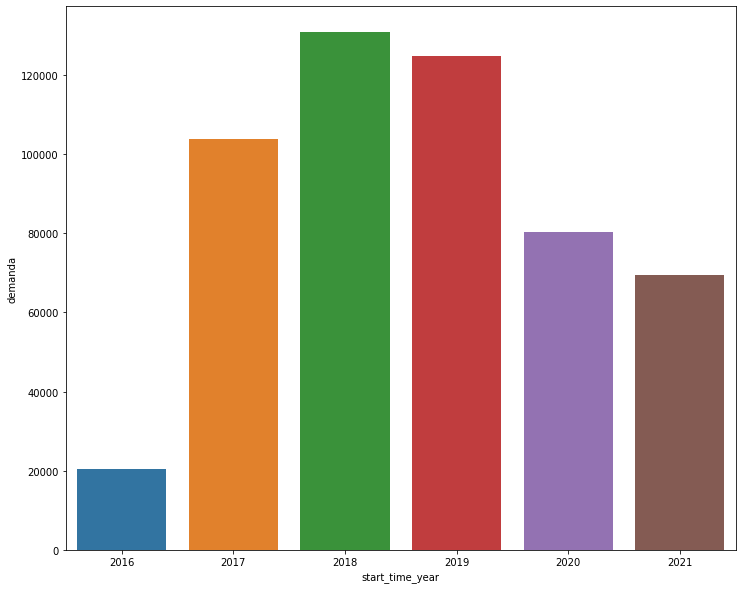

In [282]:
jdf_train_t2_years_summary = jdf_train_t2_years.groupby(by=['start_time_year'], as_index=False)['demanda'].sum()
print(jdf_train_t2_years_summary)
jfig, jax = plt.subplots(figsize=(12,10))
sns.barplot(data=jdf_train_t2_years_summary, x='start_time_year', y='demanda', ax=jax)

In [264]:
jdf_train_t2.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_id,529749.0,1.040311e+08,4.561515e+07,8.369648e+06,6.959145e+07,1.149843e+08,1.373129e+08,1.794076e+08
duration,529749.0,1.391117e+01,1.076006e+01,1.000000e+00,6.000000e+00,1.100000e+01,1.800000e+01,5.900000e+01
start_station,529749.0,3.396318e+03,5.771614e+02,3.005000e+03,3.030000e+03,3.055000e+03,4.166000e+03,4.594000e+03
end_station,529749.0,3.394910e+03,5.763261e+02,3.000000e+03,3.030000e+03,3.054000e+03,4.165000e+03,4.594000e+03
distance,529749.0,1.406070e+00,1.031114e+00,9.969952e-02,7.397108e-01,1.122105e+00,1.791750e+00,4.004427e+01
start_time_hour,529749.0,1.409740e+01,4.717657e+00,0.000000e+00,1.100000e+01,1.500000e+01,1.800000e+01,2.300000e+01
start_time_weekday,529749.0,2.904253e+00,1.944781e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00
end_time_hour,529749.0,1.425406e+01,4.771341e+00,0.000000e+00,1.100000e+01,1.500000e+01,1.800000e+01,2.300000e+01
end_time_weekday,529749.0,2.904768e+00,1.945581e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00
demanda,529749.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:>

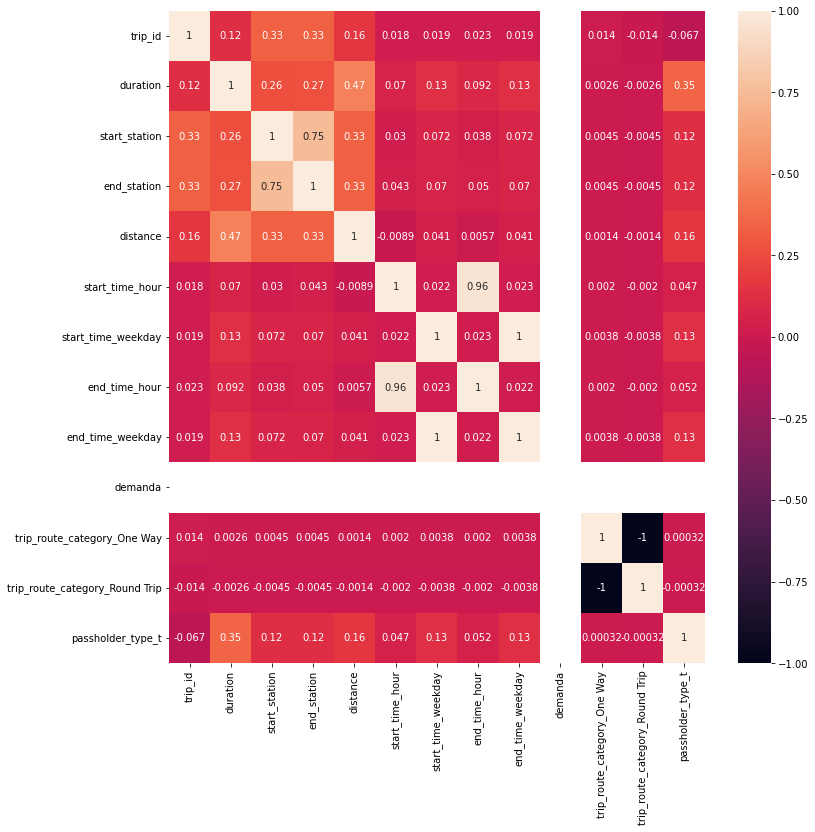

In [269]:
jfig, jax = plt.subplots(figsize=(12,12))
sns.heatmap(jdf_train_t2.corr(), annot=True, ax=jax)

In [265]:
jdf_train_t3 = jdataframe_raw_OneHotEnoding_transform(jdf_train_raw)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529749 entries, 1 to 699999
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_id                         529749 non-null  int64         
 1   duration                        529749 non-null  int64         
 2   start_time                      529749 non-null  datetime64[ns]
 3   end_time                        529749 non-null  datetime64[ns]
 4   bike_id                         529749 non-null  object        
 5   passholder_type                 529749 non-null  object        
 6   start_station                   529749 non-null  int64         
 7   end_station                     529749 non-null  int64         
 8   distance                        529749 non-null  float64       
 9   start_time_date                 529749 non-null  object        
 10  end_time_date                   529749 non-null  object 

In [ ]:
jdf_train_t3.describe().T

<AxesSubplot:>

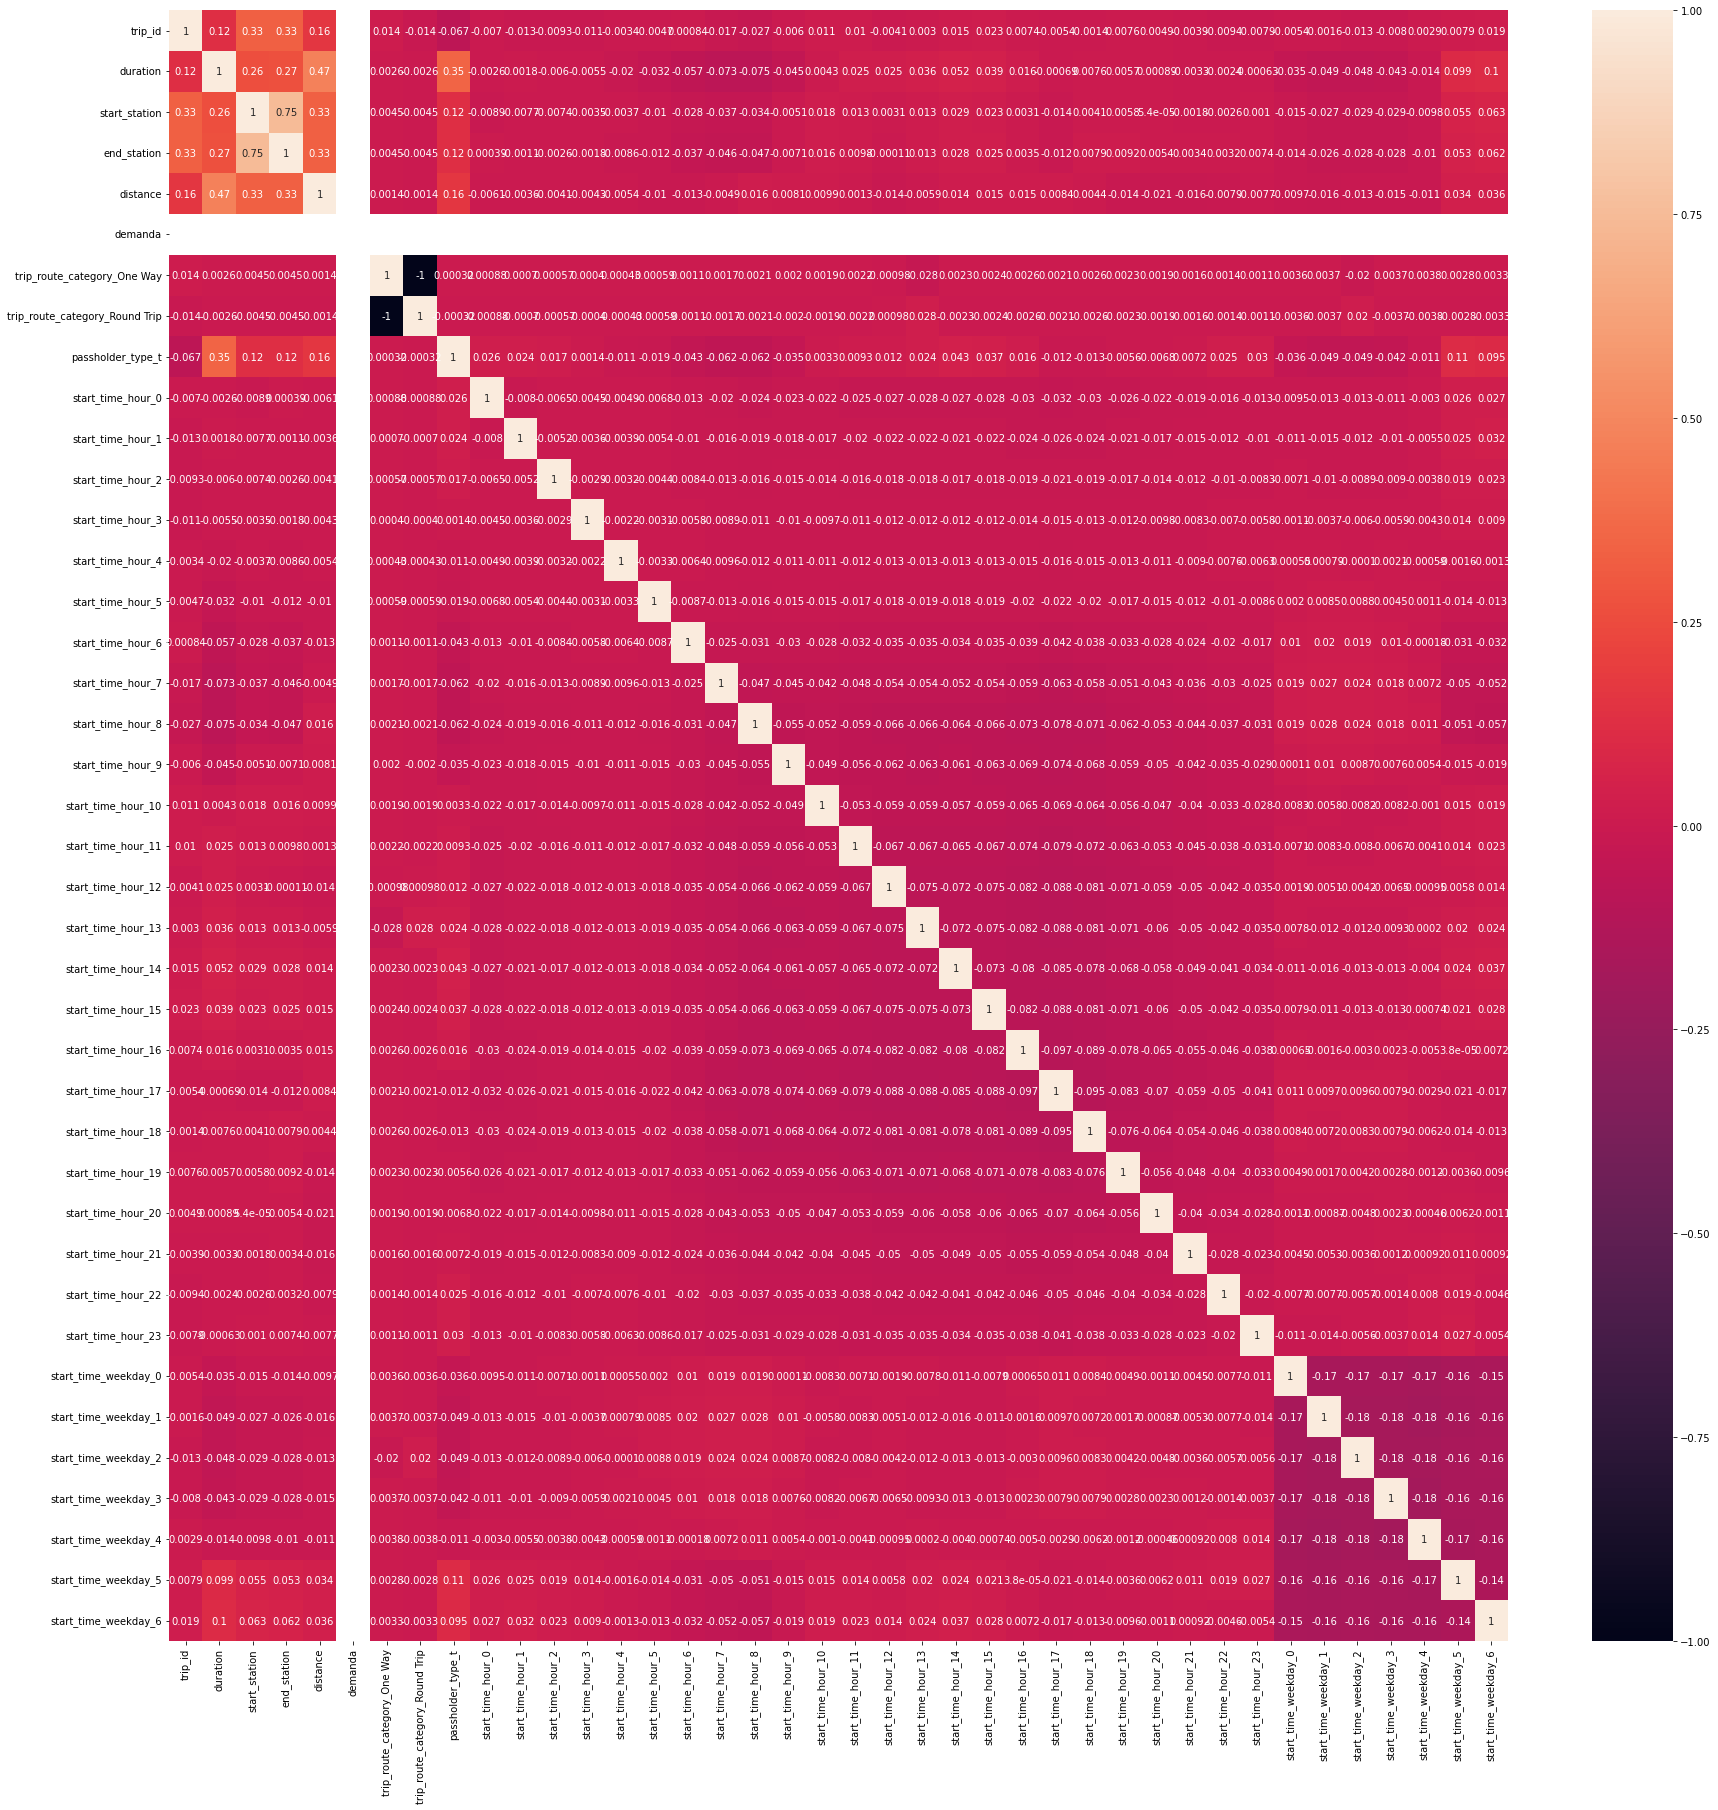

In [272]:
jfig, jax = plt.subplots(figsize=(30,30))
sns.heatmap(jdf_train_t3.corr(), annot=True, ax=jax)